<a href="https://colab.research.google.com/github/hwangsaeyeon/dacon/blob/main/other_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

train = pd.read_csv("/content/drive/MyDrive/mood/train.csv",index_col=0)
test = pd.read_csv("/content/drive/MyDrive/mood/test.csv",index_col=0)

In [5]:
train = pd.DataFrame(train)

In [4]:
train.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'country', 'introelapse',
       'testelapse', 'surveyelapse', 'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4',
       'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'VCL1', 'VCL2',
       'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10',
       'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16', 'education',
       'urban', 'gender', 'engnat', 'age', 'hand', 'religion', 'orientation',
       'voted', 'married', 'familysize', 'ASD', 'nerdiness'],
      dtype='object')

#가설1. education이 높으면 nerdiness가 줄어들 것이다
education이 1인 사람이 nerdiness가 1인 비율이 높았다

In [30]:
row_one = []
row_zero = []
for i in train.index:
  if train['nerdiness'][i]==1:
    row_one.append(i)
  if train['nerdiness'][i]==0:
    row_zero.append(i)

In [11]:
no1 = len(row_one)
no0 = len(row_zero)
print(len(row_one))
print(len(row_zero))

8303
6697


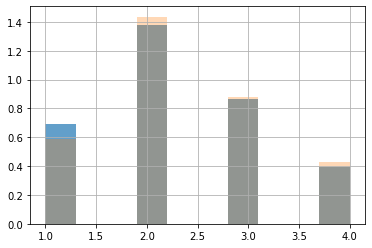

In [54]:
train.loc[row_one,'education'].hist(density=True,alpha=0.7)
train.loc[row_zero,'education'].hist(density=True,alpha=0.3)

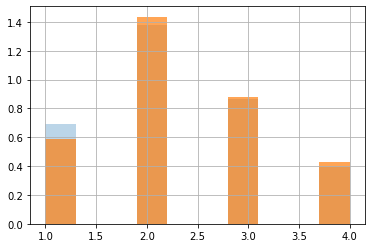

In [51]:
train.loc[row_one,'education'].hist(density=True,alpha=0.3)
train.loc[row_zero,'education'].hist(density=True,alpha=0.7)

# 가설2. voted에 따른 nerdiness의 차이가 있을 것이다.
nerdiness가 1인 사람이 voted가 1인 비율이 더 높았다

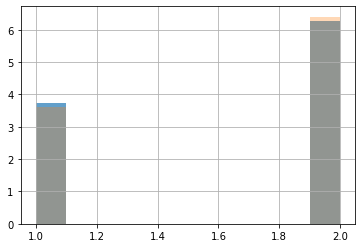

In [52]:
train.loc[row_one,'voted'].hist(density=True,alpha=0.7)
train.loc[row_zero,'voted'].hist(density=True,alpha=0.3)

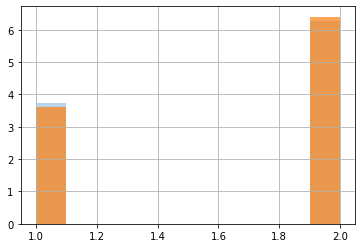

In [53]:
train.loc[row_one,'voted'].hist(density=True,alpha=0.3)
train.loc[row_zero,'voted'].hist(density=True,alpha=0.7)

# 가설3. ASD에 따른 nerdiness의 차이가 있을 것이다.
ASD가 2인 사람이 nerdiness가 0인 비율이 조금 높고, ASD가 1인 사람이 nerdiness가 1인 비율이 조금 높음

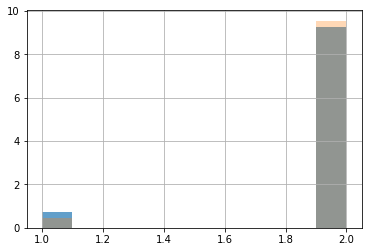

In [46]:
train.loc[row_one,'ASD'].hist(density=True,alpha=0.7)
train.loc[row_zero,'ASD'].hist(density=True,alpha=0.3)

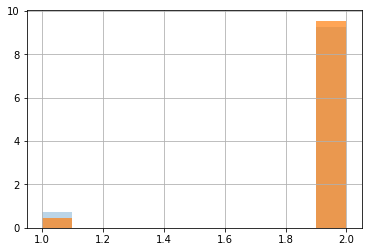

In [47]:
train.loc[row_one,'ASD'].hist(density=True,alpha=0.3)
train.loc[row_zero,'ASD'].hist(density=True,alpha=0.7)

# 가설4. 왼손잡이와 nerdiness 사이에 유의미한 관계가 있을 것이다

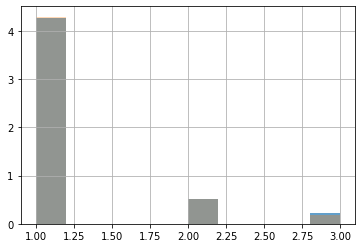

In [44]:
train.loc[row_one,'hand'].hist(density=True, alpha=0.7)
train.loc[row_zero,'hand'].hist(density=True, alpha=0.3)

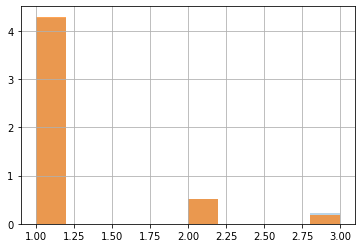

In [45]:
train.loc[row_one,'hand'].hist(density=True, alpha=0.3)
train.loc[row_zero,'hand'].hist(density=True, alpha=0.7)

nerdiness=0일수록 orientation 1의 값이 높다

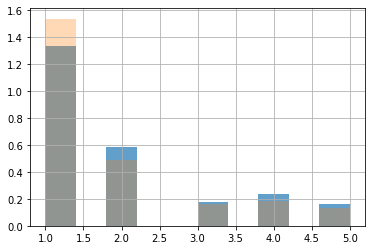

In [42]:
train.loc[row_one,'orientation'].hist(density=True,alpha=0.7,)
train.loc[row_zero,'orientation'].hist(density=True,alpha=0.3,)

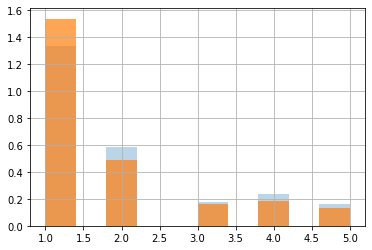

In [43]:
train.loc[row_one,'orientation'].hist(density=True,alpha=0.3,)
train.loc[row_zero,'orientation'].hist(density=True,alpha=0.7,) 

# 가설5. vocabulary를 많이 알수록 nerdiness의 비율이 줄어들 것이다.

In [115]:
#6,9,12제외
vocab = ['VCL1', 'VCL2','VCL3', 'VCL4', 'VCL5', 'VCL7', 'VCL8',  'VCL10', 'VCL11',  'VCL13', 'VCL14', 'VCL15', 'VCL16']
vocability1 = []
a=0
for i in vocab:
  ability=0
  for j in row_one:
    if train[i][j] == 1:
      ability+=1
  vocability1.append(ability/no1)
  a+=1

vocability0=[]
a=0
for i in vocab:
  ability=0
  for j in row_zero:
    if train[i][j] == 1:
      ability+=1
  vocability0.append(ability/no0)
  a+=1

In [116]:
print(vocability1)
print(vocability0)

[0.9649524268336745, 0.9392990485366735, 0.577983861254968, 0.975430567264844, 0.9576056846922799, 0.24798265687101048, 0.4636878236781886, 0.9608575213778152, 0.30278212694206913, 0.8032036613272311, 0.9291822232927858, 0.9667590027700831, 0.9834999397808021]
[0.9508735254591608, 0.8998058832312976, 0.4685680155293415, 0.9596834403464237, 0.9345975810064208, 0.22114379572943108, 0.4030162759444527, 0.9501269225026131, 0.25190383753919665, 0.7089741675377035, 0.8777064357174854, 0.9513214872330894, 0.9770046289383306]


In [117]:
vocab = ['VCL6', 'VCL9','VCL12',]
vocability1 = []
a=0
for i in vocab:
  ability=0
  for j in row_one:
    if train[i][j] == 1:
      ability+=1
  vocability1.append(ability/no1)
  a+=1
  
vocability0=[]
a=0
for i in vocab:
  ability=0
  for j in row_zero:
    if train[i][j] == 1:
      ability+=1
  vocability0.append(ability/no0)
  a+=1

In [118]:
print(vocability1)
print(vocability0)

[0.11056244730820186, 0.07093821510297482, 0.2348548717331085]
[0.09033895774227266, 0.06256532775869793, 0.17978199193668806]


# 가설6. 성별과 nerdiness의 관계(일반적으로 여성이 덜 nerdy한..)
nerdiness 1은 3번째 성별이 많았다

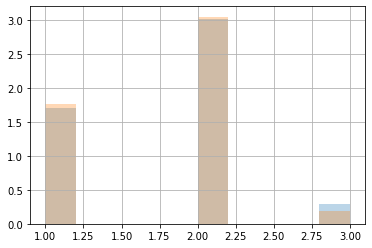

In [120]:
train.loc[row_one,'gender'].hist(density=True,alpha=0.3,)
train.loc[row_zero,'gender'].hist(density=True,alpha=0.3,) 

In [127]:
s=0
t=0
for i in train.index: 
  if train['gender'][i]==1:
    s+=train.loc[i]['VCL6']
    s+=train.loc[i]['VCL9']
    s+=train.loc[i]['VCL12']
  elif train['gender'][i] == 2:
    t+=train.loc[i]['VCL6']
    t+=train.loc[i]['VCL9']
    t+=train.loc[i]['VCL12']

In [126]:
s/sum(train['gender']==1) #male

0.33777520278099654

In [129]:
t/sum(train['gender']==2) #female

0.39288075821027113

# 그 외

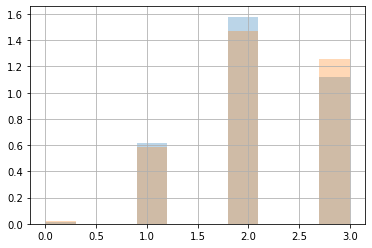

In [132]:
train.loc[row_one,'urban'].hist(density=True,alpha=0.3,) #blue,suburban
train.loc[row_zero,'urban'].hist(density=True,alpha=0.3,) #orange,urban(도시) 

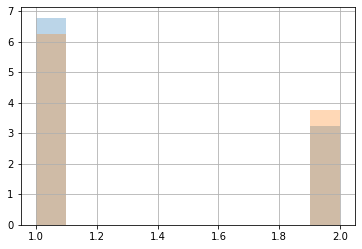

In [135]:
train.loc[row_one,'engnat'].hist(density=True,alpha=0.3,) #blue,모국어
train.loc[row_zero,'engnat'].hist(density=True,alpha=0.3,) #orange,모국어가 아님 

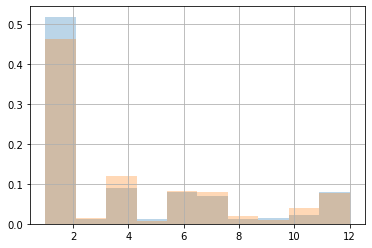

In [136]:
train.loc[row_one,'religion'].hist(density=True,alpha=0.3,) #blue,1번 종교가 많다 
train.loc[row_zero,'religion'].hist(density=True,alpha=0.3,) #orange,

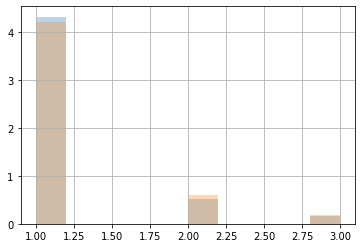

In [137]:
train.loc[row_one,'married'].hist(density=True,alpha=0.3,) #blue,1-never married가 많다 
train.loc[row_zero,'married'].hist(density=True,alpha=0.3,) #orange,2

# familysize, age

In [151]:
train = train.drop(1019)
train['familysize'].sort_values(ascending=False)

KeyError: ignored

In [152]:
row_one = []
row_zero = []
for i in train.index:
  if train['nerdiness'][i]==1:
    row_one.append(i)
  if train['nerdiness'][i]==0:
    row_zero.append(i)

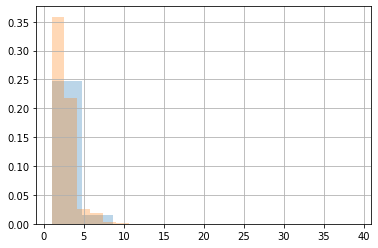

In [153]:
train.loc[row_one,'familysize'].hist(density=True,alpha=0.3,) #blue,
train.loc[row_zero,'familysize'].hist(density=True,alpha=0.3,) #orange,작은 가족단위가 많음 

In [158]:
train = train.drop([9273,6725,4976,14135,1739,])
train['age'].sort_values(ascending=False)

index
4002     123
12092     99
6526      88
12574     81
14991     80
        ... 
3787      13
13936     13
9031      13
9036      13
11834     13
Name: age, Length: 14994, dtype: int64

In [168]:
train['age'][0]

20

In [178]:
#연령대 구분 
for i in train.index:
  if train['age'][i] >=13 and train['age'][i]<30:
    train.loc[i,'new_age'] = 1
  elif train['age'][i] >=30 and train['age'][i] <50:
    train.loc[i,'new_age'] = 2
  elif train['age'][i] >=50 and train['age'][i] <70:
    train.loc[i,'new_age'] = 3
  else:
    train.loc[i,'new_age'] = 4


In [175]:
row_one = []
row_zero = []
for i in train.index:
  if train['nerdiness'][i]==1:
    row_one.append(i)
  if train['nerdiness'][i]==0:
    row_zero.append(i)

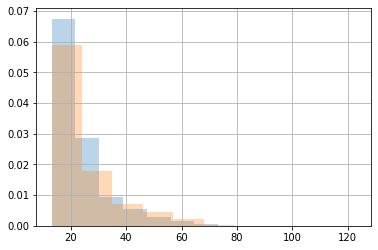

In [162]:
train.loc[row_one,'age'].hist(density=True,alpha=0.3,) #blue,10대,20대에게서 많이 보임 
train.loc[row_zero,'age'].hist(density=True,alpha=0.3,) #orange,

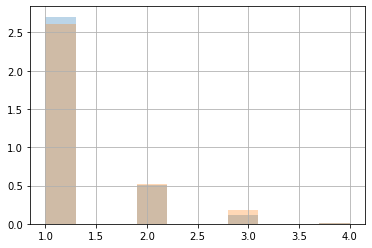

In [179]:
train.loc[row_one,'new_age'].hist(density=True,alpha=0.3,) #blue,10대,20대에게서 많이 보임 
train.loc[row_zero,'new_age'].hist(density=True,alpha=0.3,) #orange,

#시간

In [180]:
train.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'country', 'introelapse',
       'testelapse', 'surveyelapse', 'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4',
       'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'VCL1', 'VCL2',
       'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10',
       'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16', 'education',
       'urban', 'gender', 'engnat', 'age', 'hand', 'religion', 'orientation',
       'voted', 'married', 'familysize', 'ASD', 'nerdiness', 'new_age'],
      dtype='object')

In [181]:
train['introelapse'].sort_values(ascending=False)

index
13840    855030
6318     855030
14665    817147
373      285418
1779     285418
          ...  
6340          1
3651          1
10033         1
3617          1
8422          1
Name: introelapse, Length: 14994, dtype: int64

In [191]:
train['testelapse'].sort_values(ascending=False)

index
5196     474572
6836     474572
3698     407208
12427    374744
373      285399
          ...  
14381        30
2785         25
7533          4
13676         4
13189         1
Name: testelapse, Length: 14994, dtype: int64

In [190]:
train['surveyelapse'].sort_values(ascending=False)

index
4367     15166994
1702     15166994
13517     3420008
14906     2513542
5009       474940
           ...   
738             4
835             4
663             4
14037           4
9142            3
Name: surveyelapse, Length: 14994, dtype: int64

In [185]:
fill_train = train.fillna(0)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc551d88c50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc551d4e710>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc551d88cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc551d83e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc551d83050>],
 'means': []}

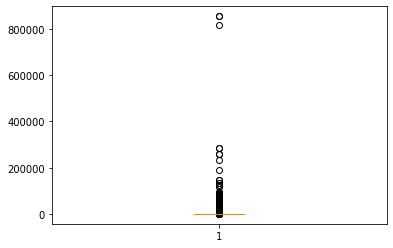

In [187]:
plt.boxplot(fill_train['introelapse'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc551c54110>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc551c54b90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc551c4eb50>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc551c5a690>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc551c5abd0>],
 'means': []}

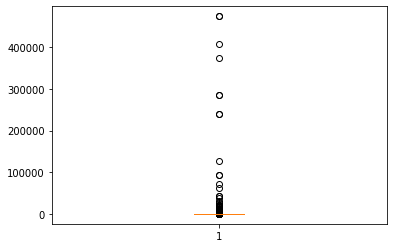

In [189]:
plt.boxplot(fill_train['testelapse'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc551ce56d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc551ceb190>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc551ce5150>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc551cebc50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc551cf31d0>],
 'means': []}

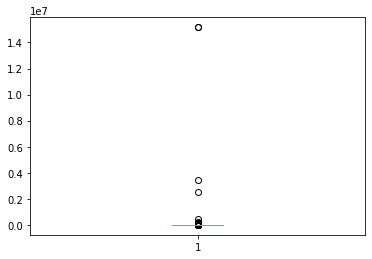

In [188]:
plt.boxplot(fill_train['surveyelapse'])

In [206]:
train = fill_train.drop([13840,6318,14665,5196,6836,3698,12427,373,4367,1702])

KeyError: ignored

In [207]:
for i in train.index:
  if train['introelapse'][i] >= train['introelapse'].median():
    train.loc[i,'intro_time'] = 1
  else:
    train.loc[i,'intro_time'] = 0 

  if train['testelapse'][i] >= train['testelapse'].median():
    train.loc[i,'test_time'] = 1
  else:
    train.loc[i,'test_time']=0


  if train['surveyelapse'][i] >= train['surveyelapse'].median():
    train.loc[i,'survey_time'] = 1
  else:
    train.loc[i,'survey_time'] = 0 

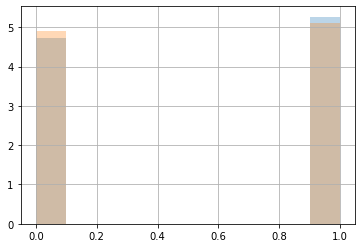

In [211]:
train.loc[row_one,'intro_time'].hist(density=True,alpha=0.3,) #blue,
train.loc[row_zero,'intro_time'].hist(density=True,alpha=0.3,) #orange,

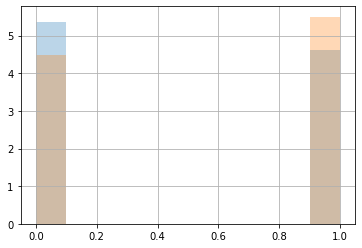

In [212]:
train.loc[row_one,'test_time'].hist(density=True,alpha=0.3,) #blue, test time이 짧다 
train.loc[row_zero,'test_time'].hist(density=True,alpha=0.3,) #orange,

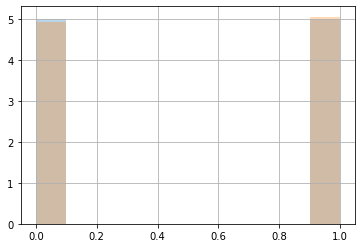

In [213]:
train.loc[row_one,'survey_time'].hist(density=True,alpha=0.3,) #blue,
train.loc[row_zero,'survey_time'].hist(density=True,alpha=0.3,) #orange,

#Question 극단값

In [219]:
question = train.columns[0:26]

extreme_val = []

for i in train.index:
  extreme = 0 
  not_extreme = 0 
  
  for j in question:
    if train[j][i] == 1 or train[j][i] == 5 :
      extreme+=1 
  extreme_val.append(extreme)
      

In [222]:
train.loc[:,'extreme_val']=extreme_val
train

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,voted,married,familysize,ASD,nerdiness,new_age,intro_time,test_time,survey_time,extreme_val
index,,,,,,,,,,,,,,,,,,,,,
0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,3.0,...,2.0,1.0,4.0,2.0,1,1.0,0.0,1.0,0.0,24
1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,...,1.0,2.0,4.0,2.0,1,2.0,0.0,0.0,0.0,10
2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,4.0,...,2.0,3.0,4.0,2.0,1,2.0,0.0,1.0,0.0,13
3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,4.0,...,2.0,1.0,2.0,2.0,1,1.0,0.0,1.0,0.0,3
4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,4.0,...,2.0,1.0,1.0,2.0,0,1.0,0.0,1.0,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,...,2.0,1.0,3.0,2.0,0,1.0,1.0,0.0,0.0,5
14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,...,1.0,2.0,3.0,2.0,1,2.0,1.0,1.0,1.0,12
14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,...,1.0,1.0,3.0,1.0,1,1.0,1.0,0.0,1.0,19


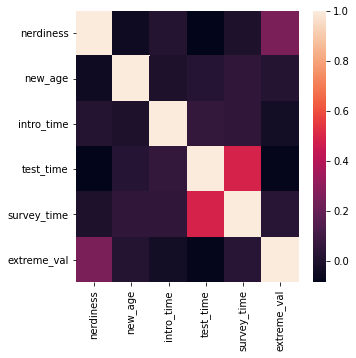

In [234]:
import seaborn as sns

plt.figure(figsize=(5,5))
sns.heatmap(train.loc[:,['nerdiness','new_age','intro_time','test_time','survey_time','extreme_val']].corr(),
            )
plt.show()